In [1]:
%matplotlib inline
import numpy as np
#import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats
#from io import StringIO
#print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join,QTable
from astropy.table import unique as tab_unique
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#
#import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map

from astropy.table import setdiff

from scipy.stats import ks_2samp
#import ndtest

import sys

from matplotlib.colors import LinearSegmentedColormap


/home/sanchez/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


2.2.0


In [2]:
from diagnostic_diagrams_plots import diagnostic_diagram_plot
from diagnostic_diagrams_plots import main_plot_function
from misc import kewley
from utils_plot import textonly, textonly2

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

In [4]:
def plot_diagnostic_diagram_single(type_plot: str, statistic: str,
                                   prop: str,
                                   data: pd.DataFrame,
                                   ax: plt.Axes,
                                   vmin=None, vmax=None,
                                   histogram=False) -> mpl.image.AxesImage:
    """
    Diagnostic diagrams plotting auxiliary function
    """
    ylabel = 'log_OIII_Hb_cen'
    if type_plot == 'O3N2':
        xlabel = 'log_NII_Ha_cen'
    elif type_plot == 'O3S2':
        xlabel = 'log_SII_Ha_cen'
    elif type_plot == 'O3O1':
        xlabel = 'log_OI_Ha_cen'
    elif type_plot == 'O3O2':
        xlabel = 'log_OII_Hb_cen'
    x_data = data[xlabel]
    y_data = data[ylabel]
    z_data = data[prop]
    mean_prop = np.mean(z_data)
    std_prop = np.std(z_data)
    # print(prop, mean_prop, std_prop)
    if statistic == 'mean':
        if vmin is None:
            if prop == 'Av':
                vmin = 0
            else:
                vmin = mean_prop - 3*std_prop
        if vmax is None:
            if prop == 'Av':
                vmax = 2*mean_prop
            else:
                vmax = mean_prop + 3*std_prop
    elif statistic == 'std':
        if vmin is None:
            vmin = 0
        if vmax is None:
            vmax = 2*std_prop
    plot = diagnostic_diagram_plot(x_data, y_data, z_data, type_plot=type_plot,
                                   vmin=vmin, vmax=vmax, ax=ax,
                                   statistic=statistic)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.tick_params(axis='both', which='both', direction='in', top=True,
                   right=True)
    if histogram:
        axis_ins = ax.inset_axes([0.05, 0.10, 0.35, 0.15])
        counts, bins, _ = axis_ins.hist(z_data, bins=60, density=True,
                                        range=(vmin, vmax), color='k')
        axis_ins.plot([mean_prop, mean_prop], [0, max(counts)], 'r--', lw=1)
        msg = r"${}\pm{}$".format(np.round(mean_prop, 2),
                                  np.round(std_prop, 2))
        if prop == 'f_y':
            y_pos = mean_prop+.05
        else:
            y_pos = mean_prop-1.5*np.abs(mean_prop)
#            y_pos = mean_prop+.15
        axis_ins.text(y_pos, max(counts)*(1.1), msg, {'fontsize': 14})
        axis_ins.spines['top'].set_visible(False)
        axis_ins.spines['right'].set_visible(False)
        axis_ins.spines['left'].set_visible(False)
        axis_ins.set_yticks([])
        #axis_ins.set_xticklabels([])
        axis_ins.patch.set_alpha(0.1)
        #axis_ins.set_xticks(get_ticks_hist(prop))
    return plot


In [5]:
import matplotlib.colors as mcolors
color_cm_now = vel_map()
color_cm_r = color_cm_now.reversed()



In [6]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   1.5,\
           'ytick.minor.size'        :   1.5,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   0.5,\
           'ytick.minor.width'       :   0.5,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [7]:
#
def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='Wistia_r', cm_r='Wistia', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1, if_plot=0, max_c=0.95, Delta=0.15, if_axis=0):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title=''):
#    cm = califa_vel_r
#    cm='Wistia_r'
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=60
    lEW_cut=0.78 #0.78
    n_obj_org=len(x_par)
    mask = x_par>-20
    n_obj=len(x_par[mask])
    mask_SFGs = mask & (c_par>lEW_cut)
    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([max_c,0.80,0.40,-0.01])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals_new))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        den_par[i]=1.0
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))



    if (if_scatter==1):
        figure=ax.scatter(x_par, y_par, s=10, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='lightyellow',cmap=cm,\
                          rasterized=True,label=title)
        figure=ax.scatter(x_par, y_par, s=12, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='none',cmap=cm,\
                          rasterized=True)

    if (if_contour==1):
        p_cont2=ax.contourf(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
                             levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)
#        p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
#                           levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)



#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    if (if_bin==1):
        p1 = ax.errorbar(m1, sM1, yerr= sD1, markersize = 10,\
                         markerfacecolor =c_color2, markeredgecolor = 'black', \
                         fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=1.0)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)            
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.05,zorder=3)
            ax.add_patch(rect)
#        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        x_plot=np.linspace(xf_min-0.15*(x_max-x_min), x_max-0.15*(x_max-x_min), 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        if (if_plot==1):
            p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor =c_color  ,\
                            color =c_color, zorder=3, alpha=0.8)

        
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")
    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
    #     if (if_contour==1):
    if ((len(title)>0) and (if_contour==1)):
        p_cont2.collections[0].set_label(title)
    if ((len(fit_title)>0) and (if_plot==1)):
        p_fit.set_label(fit_title)

#    p_cont2.collections[0].set_label(title)        
    if (if_axis==1):
        ax.set_xlim([x_min,x_max])
        ax.set_ylim([y_min,y_max])    
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.minorticks_on()
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.tick_params(which='both',direction="in")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc



#
def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='Wistia_r', cm_r='Wistia', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1, if_plot=0, max_c=0.95, Delta=0.15, if_axis=0):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title=''):
#    cm = califa_vel_r
#    cm='Wistia_r'
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=60
    lEW_cut=-10000 #0.78
    n_obj_org=len(x_par)
    mask = x_par>-20
    n_obj=len(x_par[mask])
    mask_SFGs = mask & (c_par>lEW_cut)
    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([max_c,0.80,0.40,-0.01])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals_new))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        den_par[i]=1.0
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))



    if (if_scatter==1):
        figure=ax.scatter(x_par, y_par, s=10, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='lightyellow',cmap=cm,\
                          rasterized=True,label=title)
        figure=ax.scatter(x_par, y_par, s=12, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='none',cmap=cm,\
                          rasterized=True)

    if (if_contour==1):
        p_cont2=ax.contourf(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
                             levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)
#        p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
#                           levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)



#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    if (if_bin==1):
        p1 = ax.errorbar(m1, sM1, yerr= 0.5*sD1, markersize = 10,\
                         markerfacecolor =c_color2, markeredgecolor = 'black', \
                         fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=1.0)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)            
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.05,zorder=3)
            ax.add_patch(rect)
#        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        x_plot=np.linspace(xf_min-0.15*(x_max-x_min), x_max-0.15*(x_max-x_min), 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        if (if_plot==1):
            p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor =c_color  ,\
                            color =c_color, zorder=3, alpha=0.8)

        
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")
    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
    #     if (if_contour==1):
    if ((len(title)>0) and (if_contour==1)):
        p_cont2.collections[0].set_label(title)
    if ((len(fit_title)>0) and (if_plot==1)):
        p_fit.set_label(fit_title)

#    p_cont2.collections[0].set_label(title)        
    if (if_axis==1):
        ax.set_xlim([x_min,x_max])
        ax.set_ylim([y_min,y_max])    
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.minorticks_on()
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.tick_params(which='both',direction="in")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc



def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def plot_2Dhist(x_par=None,y_par=None,z_par=None,x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear'):

    fig = plt.figure(figsize=(9,7))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    ax.scatter(x_par, y_par, s=size_scatter*3, c=z_par,\
               vmin=z_min,vmax=z_max,alpha=alpha,edgecolor='none',cmap=color_cm_now,\
               rasterized=True,label=label)
    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]    
    if (labels_zbins==None):    
        labels_zbins=np.zeros(n_zbins)
    #print(labels_zbins,delta_z)
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        #print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
#        print(z_bins,z_bin_min,z_bin_max)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
#        print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    fig.tight_layout()
    fig.savefig('fig/'+figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
    
    
    
def plot_2Dhist_map(x_par=None,y_par=None,z_par=None,\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear',contour=0,\
                   if_fit=0,conts=[0.95,0.65,0.40],med=0):

    fig = plt.figure(figsize=(8,6))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)

#    colormap = plt.cm(color_cm_now)
    #ax.scatter(x_par, y_par, s=size_scatter*3, \
    #           alpha=0.1*alpha,edgecolor='none',color='black',\
    #           rasterized=True,label=label)
    
#    for indx in arange(n_zbins):
    
#    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
#               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
    cmap_truncate=truncate_colormap(colormap, n=n_zbins)
    
#    print(mapcolors)
    if (labels_zbins==None):
        labels_zbins=np.zeros(n_zbins)
    X=[]
    Y=[]
    C=[]
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        #print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
        new_cmap=truncate_colormap(colormap, minval=indx/n_zbins-0.05, maxval=indx/n_zbins+0.05, n=3)
        if (med==0):
            x_mean=np.mean(x_par[mask_z_par])
            y_mean=np.mean(y_par[mask_z_par])
        else:
            x_mean=np.median(x_par[mask_z_par])
            y_mean=np.median(y_par[mask_z_par])
        X.append(x_mean)
        Y.append(y_mean)
        C.append(indx)
        print(labels_zbins[indx],x_mean,y_mean,y_mean/x_mean,y_mean-x_mean)
        my_contourf(ax,x_par[mask_z_par],y_par[mask_z_par],\
                   x_min,x_max,y_min,y_max,c_color=mapcolors[indx],\
            nbins=25,title=label,linewidths=3,alpha=0.6*alpha,\
                   conts=[0.85,0.01],cmap=new_cmap,colors=1)
#    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    

    
    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        #print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
#    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)
    
    if (contour==1):
        my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
                   nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,zorder=100)
#    cmap_truncate=truncate_colormap(colormap, n=n_zbins)
    cmap_now = LinearSegmentedColormap.from_list('cmap_now', mapcolors, N=len(mapcolors))
    ax.scatter(X,Y,edgecolor='black',s=150,c=C,vmin=np.min(C),vmax=np.max(C),linewidths=3,\
               cmap=cmap_now,alpha=alpha)

#    ax.scatter(X,Y,edgecolor='black',s=150,c=C,vmin=np.min(C),vmax=np.max(C),linewidths=3,\
#               cmap=cmap_truncate,alpha=alpha)
   
    if (if_fit==1):
        pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax,\
                                              x_par,\
                                              y_par,\
                                              z_par,\
                                              x_min,x_max,y_min,y_max,z_min,z_max,'',\
                                              '',-2,title='', fit_title='', Delta=(x_max-x_min)/50,\
                                             if_contour=0, if_bin=1, if_scatter=0, max_c=0.95,den_par_min=0.85)
        x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
        y_plot=pa1[0]+pa1[1]*x_plot
        fact=1.0
        l_b=np.round(pa1[0],2)
        l_a=np.round(pa1[1],2)
        r_now=rc[0,1]
        l_r=np.round(r_now,2)
        l_s=np.round(s_dy_par*fact,2)
        label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
        p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black',\
                        color ='black',zorder=10,label=label,alpha=0.85)

        
    ax.set_xlabel(x_label, fontsize=25)
    ax.set_ylabel(y_label, fontsize=25)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
#    ax_histy.set_ylim(y_min,y_max)
#    ax_histx.set_xlim(x_min,x_max)
    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label).set_zorder(10000)#,\
#             framealpha=None)
#.set_zorder(100)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    return fig,ax
#    fig.tight_layout()
#    fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

##########

def comp_plot_hist(x_par=None,y_par=None,\
                x_min=7,x_max=13,y_min=7,y_max=13,c_main='grey',label='MPL-11',\
                x_label='log Mass',y_label='log Mass',figname='Mst_comp',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear', 
               scatter=1,cmap=color_cm_now,conts=[0.99,0.95,0.65,0.0], equal=None, one=None, offset=None,\
                  x_min_p=None,x_max_p=None,y_min_p=None,y_max_p=None,fsize=(6,6), x_r=0, y_r=0):
    if (equal is None):
        y_min=x_min
        y_max=x_max
    #alpha=1
#    print(y_par)

    fig = plt.figure(figsize=fsize)
    left, width = 0.17, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)   
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    if (one is None):
        ax.plot([x_min,x_max],[y_min,y_max],linewidth=3,color='black',ls='--')
    if (scatter==1):
        ax.scatter(x_par, y_par, s=size_scatter*3, \
                   alpha=alpha,color='black',edgecolor='none',\
                   rasterized=True,label=label)
    my_contourf(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,cmap=cmap)
    par=x_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    #sns.kdeplot(par,ax=ax_histx, shade=True, legend=False,\
    #            color="grey")#,gridsize=int(len(rat[mask])/2)
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 2.)
    max_kde_xx=np.max(kde_xx(xx))
    yy=(kde_xx(xx))/np.max(kde_xx(xx))
    ax_histx.fill_between(xx,0*yy,yy,color='grey',alpha=alpha)
    ax_histx.plot(xx,yy,color="black",linewidth=1.5,alpha=alpha)
    
    par=y_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    xx=(kde_yy(yy))/np.max(kde_yy(yy))
    ax_histy.fill_betweenx(yy,0*xx,xx,color='grey',alpha=alpha)
    ax_histy.plot(xx,yy,color="black",linewidth=1.5,alpha=alpha)
        
    #ax_histx.spines['right'].set_visible(False)
    #ax_histx.spines['top'].set_visible(False)
    #ax_histx.spines['left'].set_visible(False)
    #ax_histx.get_yaxis().set_visible(False)
    #ax_histx.patch.set_alpha(0)

    a_mean="{:0.2f}".format(mean)#np.round(mean,decimals=2)
    a_std="{:0.2f}".format(std)#np.round(std,decimals=2)
    
#    ax.text(x_min+0.45*(x_max-x_min),y_min+0.05*(y_max-y_min),rf'$\Delta$={a_mean}$\pm${a_std}', fontsize=23)
    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)
    #ax.set_xticks(ax.get_yticks())
    if (x_min_p==None):
        x_min_p=x_min
        x_max_p=x_max
        y_min_p=y_min
        y_max_p=y_max
    ax.set_xlim([x_min_p,x_max_p])
    ax.set_ylim([y_min_p,y_max_p])
#    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    if (x_r==1):
        ax.set_xlim([x_max_p,x_min_p])
    if (y_r==1):
        ax.set_ylim([y_max_p,y_min_p])


    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    if (equal is None):
        ax.set_xticks(ax.get_yticks())
    
    return fig,ax,mean,std


In [8]:
def find_bins_fix(data, min_points_per_bin, min_bin_width):
    """
    Function to find bins that fulfill two criteria:
    1. Minimum number of points in each bin
    2. Minimum width of the bins
    
    Parameters:
    - data: 1D array of data points
    - min_points_per_bin: Minimum number of points required in each bin
    - min_bin_width: Minimum width required for each bin
    
    Returns:
    - bins: List of bin edges that fulfill the criteria
    """
    # Sort the data
    sorted_data = np.sort(data)
    
    # Initialize bins list with the first bin
    bins = [sorted_data[0]]
    
    # Iterate through the sorted data to find bin edges
    for i in range(1, len(sorted_data)):
        if sorted_data[i] - bins[-1] >= min_bin_width:
            # Check if adding the next point forms a bin with sufficient width
            if i >= min_points_per_bin:
                # Check if there are enough points in the current bin
                bins.append(sorted_data[i])
    
    # Append the last data point to complete the last bin
    bins.append(sorted_data[-1])
    
    return bins


In [9]:
def find_bins(data, min_points_per_bin, min_bin_width):
    """
    Function to find bins that fulfill two criteria:
    1. Minimum number of points in each bin
    2. Minimum width of the bins, with an option to increase the minimum width if the number of points is not reached
    
    Parameters:
    - data: 1D array of data points
    - min_points_per_bin: Minimum number of points required in each bin
    - min_bin_width: Minimum width required for each bin
                      If the number of points in a bin is less than min_points_per_bin, 
                      the function will try to increase the bin width until the number of points meets the requirement
    
    Returns:
    - bins: List of bin edges that fulfill the criteria
    """
    # Sort the data
    sorted_data = np.sort(data)
    
    # Initialize bins list with the first bin
    bins = [sorted_data[0]]
    
    # Iterate through the sorted data to find bin edges
    for i in range(1, len(sorted_data)):
        if sorted_data[i] - bins[-1] >= min_bin_width:
            # Check if adding the next point forms a bin with sufficient width
            if i - len(bins) >= min_points_per_bin:
                # Check if there are enough points in the current bin
                bins.append(sorted_data[i])
            else:
                # Increase the minimum bin width until the number of points requirement is met
                while i - len(bins) < min_points_per_bin:
                    bins[-1] = sorted_data[i]  # Increase the end of the current bin
                    if i - len(bins) >= min_points_per_bin:
                        bins.append(sorted_data[i])  # Add the next point to start a new bin
                        break
    
    # Append the last data point to complete the last bin
    bins.append(sorted_data[-1])
    
    return bins


In [10]:
def gaussian_2d(x, y, sigma_x, sigma_y, size=(100, 100)):
    """
    Generates a 2D array with a Gaussian distribution.

    Parameters:
        x (float): Centroid along the x-axis.
        y (float): Centroid along the y-axis.
        sigma_x (float): Velocity dispersion along the x-axis.
        sigma_y (float): Velocity dispersion along the y-axis.
        size (tuple): Size of the output array (default is (100, 100)).

    Returns:
        numpy.ndarray: 2D array with Gaussian distribution.
    """
    x_vals = np.linspace(0, 1, size[1])
    y_vals = np.linspace(0, 1, size[0])
    xx, yy = np.meshgrid(x_vals, y_vals, indexing='ij')

    gaussian = np.exp(-((xx - x) ** 2 / (2 * sigma_x ** 2) + (yy - y) ** 2 / (2 * sigma_y ** 2)))
    return gaussian / (2 * np.pi * sigma_x * sigma_y)




def map_den(x,s_x,y,s_y,xLims=None,yLims=None, size=(100, 100)):
    
    out_map = np.zeros((size[1],size[0]))
    
    if (xLims==None):
        xLims=[np.nanmin(x),np.nanmax(x)]
    if (yLims==None):
        yLims=[np.nanmin(y),np.nanmax(y)]

    for (x_now,s_x_now,y_now,s_y_now) in zip(x,s_x,y,s_y):
        xc = (x_now-xLims[0])/(xLims[1]-xLims[0])
        yc = (y_now-yLims[0])/(yLims[1]-yLims[0])
        s_xc = 2*s_x_now/(xLims[1]-xLims[0])
        s_yc = 2*s_y_now/(yLims[1]-yLims[0])
        g_now = gaussian_2d(yc, xc, s_yc, s_xc, size=size)
        g_now = g_now/np.sum(g_now)
        out_map = out_map+g_now
    out_map=out_map/np.sum(out_map)
    return out_map


def hdu_map_den(x,s_x,y,s_y,xLims=None,yLims=None, size=(100, 100), hdr=None):
    hdu = fits.PrimaryHDU()
    den_map=map_den(x,s_x,y,s_y,xLims=xLims,yLims=yLims,size=size)
    hdu.header['CRVAL1']=xLims[0]
    hdu.header['CRPIX1']=1
    hdu.header['CDELT1']=(xLims[1]-xLims[0])/size[0]
    hdu.header['CRVAL2']=yLims[0]
    hdu.header['CRPIX2']=1
    hdu.header['CDELT2']=(yLims[1]-yLims[0])/size[1]
    if (hdr != None):
        for key, value in hdr.items():
            hdu.header[key]=value
    hdu.data=den_map
    return hdu


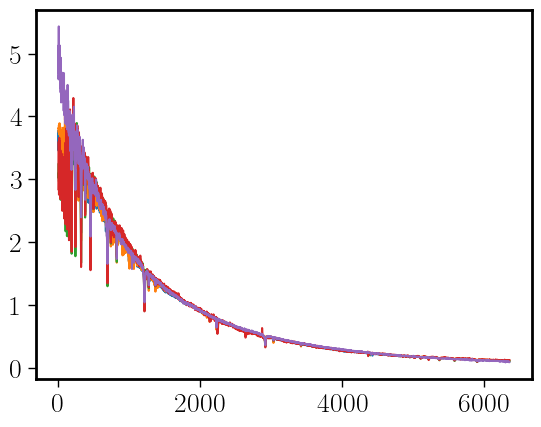

In [11]:
#
# MaStar CoSha template
#
DIR="/disk-a/sanchez/LVM/LVM/templates/"
#MaStar_file="stellar-basis-spectra-9795.fits.gz"
MaStar_file="stellar-basis-spectra-14473.fits.gz";
hdu=fits.open(f'{DIR}/{MaStar_file}')
tab=Table(hdu[1].data)  
hdu[0].data=np.float32(hdu[0].data)

for spec in hdu[0].data[0:5,:]:
    plt.plot(spec)

In [12]:
#tab['TEFF']=np.log10(tab['TEFF'])

In [13]:
tab.columns

<TableColumns names=('TEFF','LOGG','MET','ALPHAM','FNORM')>

In [14]:
hdu.info()

Filename: /disk-a/sanchez/LVM/LVM/templates//stellar-basis-spectra-14473.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (6351, 14473)   float32   
  1  PARAMETERS    1 BinTableHDU     24   14473R x 5C   ['E', 'E', 'E', 'E', 'E']   


In [15]:
#
# Some statistics
#
#
# Some statistics
#
rss_sec=hdu[0].data[:,330:440]
mean_sec=np.median(rss_sec,axis=1)
std_sec=np.std(rss_sec,axis=1)
SN_sec=mean_sec/std_sec
SN_lim = 1
mask_EL = hdu[0].data[:,320] < 0.5*(hdu[0].data[:,310]+hdu[0].data[:,330])
mask_EL = mask_EL & (hdu[0].data[:,2913] < 0.5*(hdu[0].data[:,2890]+hdu[0].data[:,2933]))
mask_EL = mask_EL & (hdu[0].data[:,2913] < 0.5*(hdu[0].data[:,2908]+hdu[0].data[:,2919]))
mask_SN = (SN_sec>SN_lim) & mask_EL #& (tab['SNR']>SN_lim)


mask_flux = tab['FNORM']>10*1e-16   


mask_SEL = mask_SN & mask_flux

print(len(SN_sec[mask_SN & mask_flux]))

print(tab)

13336
   TEFF      LOGG        MET        ALPHAM        FNORM     
--------- ---------- ----------- ------------ --------------
 3.991347  3.6830773  -3.1948388    0.5352272  5.2870833e-12
4.0006223   3.013514  -1.7409478   0.28874362  3.5190898e-12
3.9869976  3.3068283  -0.9476177    0.3589217 1.08029396e-13
3.9631872  2.8270469  -1.5009316    0.4837899  7.6729415e-14
3.9967623   3.167357  -1.2200826   0.32235542  2.8676506e-15
3.9841785  2.3983908  -1.3148929   0.28049362  2.8222308e-15
 3.974672  3.5732076  -1.6029348    0.7159472  1.7741396e-14
3.9987712  3.1497295  -2.7394512   0.54906464  1.0081833e-14
 3.976834   3.061423  -1.3894483   0.39384973  1.7296027e-14
4.0108614  3.4481218 -0.70501155   0.20745297   8.641602e-16
      ...        ...         ...          ...            ...
 3.516512  1.4905366 -0.43706432  0.051042926  1.3616907e-15
3.5316675   2.630388 -0.60302997   0.33423975  9.6540275e-15
 3.487145  1.5831841 -0.40517145 -0.019067813   7.010351e-15
3.5706923  1.10609

In [16]:
#tab=tab[mask_SN & mask_flux]
#mask_flux = tab['FNORM']>10*1e-16   
#print(len(tab))

In [17]:
#stellar-basis-spectra-100.fits.gz
#MaStar_file_few="stellar-basis-spectra-100.fits.gz"
DIR_few='/disk-a/sanchez/LVM/LVM/ver_231113/'
MaStar_file_few="mstar-stlib-n1235-SN5.fits.gz"
hdu_few=fits.open(f'{DIR_few}/{MaStar_file_few}')
tab_few=Table(hdu_few[1].data)  


In [18]:
#tab_few[1:10]
print(len(tab_few))
print(len(tab))

1235
14473


(array([5.55848725e-03, 1.61829376e-03, 8.26737027e-04, 5.80474934e-04,
        5.10114336e-04, 3.07827617e-04, 2.02286719e-04, 1.93491645e-04,
        1.14335972e-04, 8.79507476e-05]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

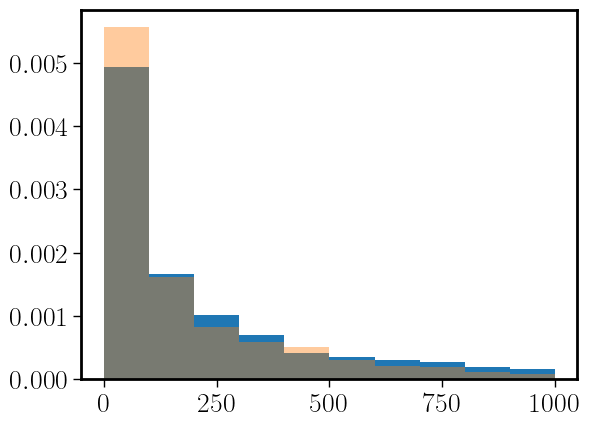

In [19]:
val=tab['FNORM']*1e16
binwidth=100
bins=bins=range(0,1000+binwidth, binwidth)
plt.hist(tab['FNORM']*1e16,bins,density=True)
plt.hist(tab_few['FNORM']*1e16,bins,density=True,alpha=0.4)



(array([0.13572967, 0.55799974, 1.17632901, 2.6241069 , 1.93037749,
        6.5301051 , 4.49416009, 0.57308336, 0.07540537, 0.52783759]),
 array([3.48053074, 3.53422165, 3.58791256, 3.64160323, 3.69529414,
        3.74898505, 3.80267596, 3.85636687, 3.91005754, 3.96374846,
        4.01743937]),
 <BarContainer object of 10 artists>)

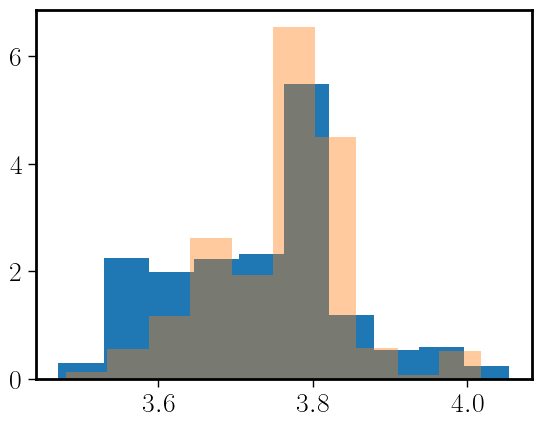

In [20]:
plt.hist(tab['TEFF'],density=True)
plt.hist(tab_few['TEFF'],density=True,alpha=0.4)

(array([0.02277844, 0.02978719, 0.06833533, 0.06483094, 0.12790972,
        0.10337909, 0.29261539, 0.61501765, 0.62202704, 0.21727119]),
 array([0.34176204, 0.8038795 , 1.26599705, 1.72811449, 2.19023204,
        2.65234947, 3.11446691, 3.57658434, 4.03870201, 4.50081921,
        4.96293688]),
 <BarContainer object of 10 artists>)

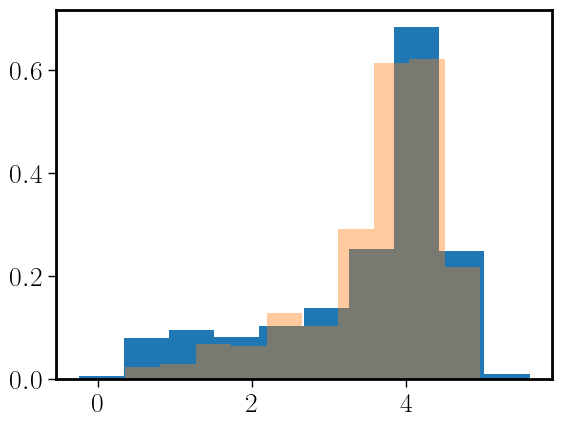

In [21]:
plt.hist(tab['LOGG'],density=True)
plt.hist(tab_few['LOGG'],density=True,alpha=0.4)

(array([0.09592714, 0.13475479, 0.15302663, 0.18043444, 0.34716488,
        0.39284454, 0.27179361, 0.50247553, 0.52759931, 0.21469409]),
 array([-3.10098028, -2.7464602 , -2.39194012, -2.03742003, -1.68290007,
        -1.32837999, -0.97385997, -0.61933994, -0.26481989,  0.08970016,
         0.44422022]),
 <BarContainer object of 10 artists>)

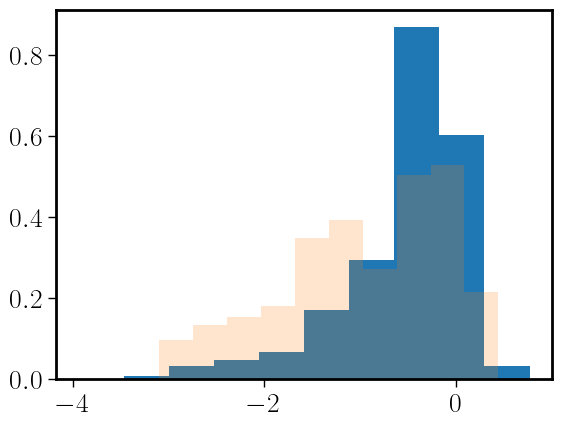

In [22]:
plt.hist(tab['MET'],density=True)
plt.hist(tab_few['MET'],density=True,alpha=0.2)

In [23]:
print(len(tab_few[tab_few['MET']>-0.5]))
print(len(tab[tab['MET']>-0.5]))

462
9168


(array([0.0527871 , 1.22290109, 2.21705809, 2.84170517, 2.49858968,
        0.25513764, 1.05574195, 0.22874409, 0.28153109, 0.21114846]),
 array([-0.16826282, -0.07622708,  0.01580865,  0.10784439,  0.19988014,
         0.29191586,  0.3839516 ,  0.47598734,  0.56802309,  0.66005886,
         0.75209457]),
 <BarContainer object of 10 artists>)

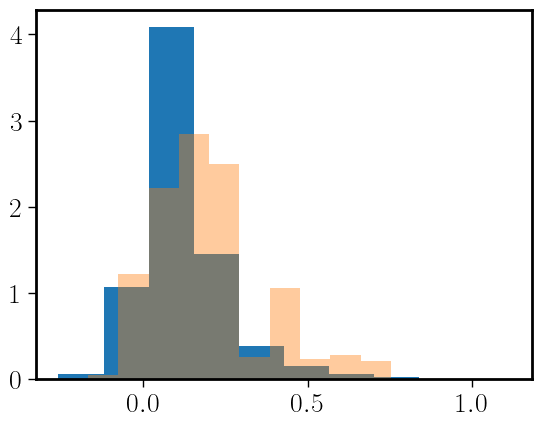

In [24]:
plt.hist(tab['ALPHAM'],density=True)
plt.hist(tab_few['ALPHAM'],density=True,alpha=0.4)

In [25]:
#dist=

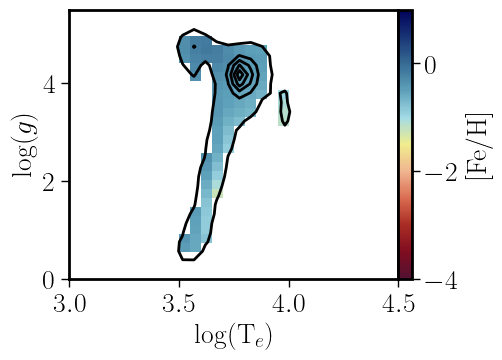

In [26]:
fig, ax = plt.subplots(figsize=(5,3.5))
params={}
params['xlim']=[3,4.5]
params['ylim']=[0,5.5]
params['norm_value']=None
params['vmin']=-4
params['vmax']=1
params['cmap']=color_cm_r
params['levels']=[0.05, 0.25, 0.45, 0.65, 0.85]
params['dcurves']=False
x = tab['TEFF']
y = tab['LOGG']
z = tab['MET']
mask_now = (x>0) & (y>-6) & (z>-100)
plot=main_plot_function(x[mask_now],y[mask_now],\
                   z[mask_now],params,ax,30,statistic='mean')
#ax.scatter(x,y)
ax.set_xlabel(r'log(T$_{e}$)')
ax.set_ylabel(r'log($g$)')
colorbar = fig.colorbar(plot, ax=ax, pad=0)
colorbar.set_label(r'[Fe/H]')

1235
13671


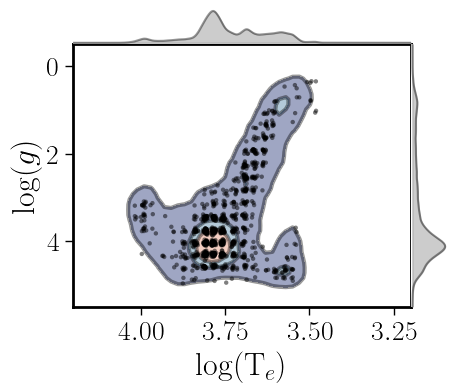

In [27]:
#mask_SN =  (tab['SNR']>SN_lim)
mask = (tab['FNORM']>0) & (mask_SN)
mask_few = tab_few['FNORM']>0
mask_few = mask_few & (tab_few['N_ST']>0)
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.99999,0.65,0.25,0.0],fsize=(4.5,3.5))
ax.scatter(tab_few['TEFF'][mask_few],tab_few['LOGG'][mask_few],color='k',edgecolor='None',alpha=0.5,s=10)
print(len(tab_few['TEFF'][mask_few]))
print(len(tab[mask]))

1235
14473


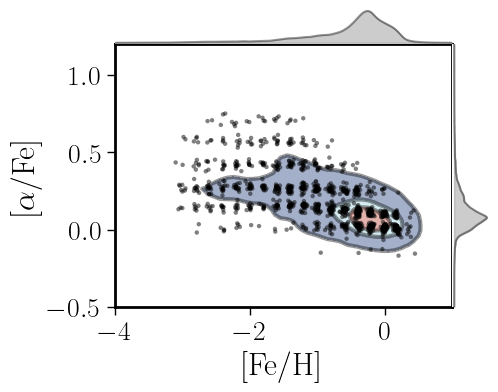

In [28]:
mask = tab['FNORM']>0 & mask_SN
mask_few = tab_few['FNORM']>0

fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.99,0.65,0.25,0.0],fsize=(4.5,3.5))
#ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='k',edgecolor='None',alpha=0.1,s=10)

ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='k',edgecolor='None',alpha=0.5,s=10)

print(len(tab_few['TEFF'][mask_few]))
print(len(tab[mask]))


#
# Distance
#
d=np.zeros((len(tab_few),len(tab_few)))
for i in np.arange(len(tab_few)):
    for j in np.arange(len(tab_few)):
        num = (hdu_few[0].data[j,:]-hdu_few[0].data[i,:])**2
        div = 0.5*(hdu_few[0].data[j,:]+hdu_few[0].data[i,:])
        d[j,i] = np.nansum(num/div)/hdu[0].data.shape[1]
    print(f'{i},',end='')
#d = np.sum(hdu_few[0].data)
#hdu_few


In [29]:
#hdu[0].data.shape[1]

#print(np.min(d),np.max(d))
#d[1,1]
plt.hist(d.flatten())


plt.imshow(np.log10(d),vmin=-2,vmax=1)
plt.colorbar()
print(np.min(d),np.max(d),np.mean(d),np.median(d),np.std(d))
print(np.min(d[d>0]),np.max(d[d>0]),np.mean(d[d>0]),np.median(d[d>0]),np.std(d[d>0]))

gamma=1.0
P=np.exp(-gamma*d**2)
plt.imshow(P)
plt.colorbar()
print(np.min(P),np.max(P),np.mean(P),np.median(P),np.std(P))
#print(np.min(d[d>0]),np.max(d[d>0]),np.mean(d[d>0]),np.median(d[d>0]),np.std(d[d>0]))


In [143]:
#n_clusters=342
#n_clusters=108
#n_clusters=36
#n_clusters=12
n_clusters=4
spec_cl = SpectralClustering(
    n_clusters=n_clusters,  
    n_neighbors=3, 
    affinity='nearest_neighbors')
cluster = spec_cl.fit_predict(hdu_few[0].data)
tab_few['cluster']=cluster


In [144]:
tab_few.columns

<TableColumns names=('N_ST','TEFF','LOGG','MET','ALPHAM','FNORM','e_TEFF','e_LOGG','e_MET','e_ALPHAM','cluster')>

In [145]:
#
# We create the PDF cubes!
#
size_PDF = (100,100)
print(size_PDF[1])
nz_PDF = len(np.unique(cluster))

PDF_Te_lg = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
PDF_Te_Alf = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
PDF_Te_Met = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
PDF_Met_Alf = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
PDF_Met_lg = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
PDF_lg_Alf = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))


Met_Lims = (-4,1)
Alf_Lims = (-0.5,1.25)
Te_Lims = (3.0,4.5)
lg_Lims = (-0.5,5.5)

for I,cl_now in enumerate(np.unique(cluster)):
    mask_cl = (tab_few['cluster'] == cl_now)
    tab_now = tab_few[mask_cl]
    print(I,cl_now,len(tab_now),';',end='')
    #
    # 'TEFF','LOGG','MET','ALPHAM'
    # PDF_Te_lg 
    x=tab_now['TEFF']
    y=tab_now['LOGG']
    s_x=tab_now['e_TEFF']
    s_y=tab_now['e_LOGG']
    xLims=Te_Lims
    yLims=lg_Lims
    PDF_Te_lg[I,:,:] = map_den(x,s_x,y,s_y,xLims=xLims,yLims=yLims, size=size_PDF) 

    # PDF_Te_Met 
    x=tab_now['TEFF']
    y=tab_now['MET']
    s_x=tab_now['e_TEFF']
    s_y=tab_now['e_MET']
    xLims=Te_Lims
    yLims=Met_Lims
    PDF_Te_Met[I,:,:] = map_den(x,s_x,y,s_y,xLims=xLims,yLims=yLims, size=size_PDF) 
    
    # PDF_Te_Alf 
    x=tab_now['TEFF']
    y=tab_now['ALPHAM']
    s_x=tab_now['e_TEFF']
    s_y=tab_now['e_ALPHAM']
    xLims=Te_Lims
    yLims=Alf_Lims
    PDF_Te_Alf[I,:,:] = map_den(x,s_x,y,s_y,xLims=xLims,yLims=yLims, size=size_PDF) 

    # PDF_Met_Alf = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
    x=tab_now['MET']
    y=tab_now['ALPHAM']
    s_x=tab_now['e_MET']
    s_y=tab_now['e_ALPHAM']
    xLims=Met_Lims
    yLims=Alf_Lims
    PDF_Met_Alf[I,:,:] = map_den(x,s_x,y,s_y,xLims=xLims,yLims=yLims, size=size_PDF) 

    # PDF_Met_lg = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
    x=tab_now['MET']
    y=tab_now['LOGG']
    s_x=tab_now['e_MET']
    s_y=tab_now['e_LOGG']
    xLims=Met_Lims
    yLims=lg_Lims
    PDF_Met_lg[I,:,:] = map_den(x,s_x,y,s_y,xLims=xLims,yLims=yLims, size=size_PDF) 
    
    # PDF_lg_Alf 
    x=tab_now['LOGG']
    y=tab_now['ALPHAM']
    s_x=tab_now['e_LOGG']
    s_y=tab_now['e_ALPHAM']
    xLims=lg_Lims
    yLims=Alf_Lims
    PDF_lg_Alf[I,:,:] = map_den(x,s_x,y,s_y,xLims=xLims,yLims=yLims, size=size_PDF) 

    
    
    
#PDF_Te_lg = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
#PDF_Te_Alf = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
#PDF_Te_Met = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))

size=size_PDF
xLims=Te_Lims
yLims=lg_Lims
hdu_Te_lg = fits.ImageHDU(PDF_Te_lg,name='PDF_TEFF_LOGG')
hdu_Te_lg.header['CRVAL1']=xLims[0]
hdu_Te_lg.header['CRPIX1']=1
hdu_Te_lg.header['CDELT1']=(xLims[1]-xLims[0])/size[0]
hdu_Te_lg.header['CRVAL2']=yLims[0]
hdu_Te_lg.header['CRPIX2']=1
hdu_Te_lg.header['CDELT2']=(yLims[1]-yLims[0])/size[1]
hdu_Te_lg.header['X']='TEFF'
hdu_Te_lg.header['Y']='LOGG'

xLims=Te_Lims
yLims=Alf_Lims
hdu_Te_Alf = fits.ImageHDU(PDF_Te_Alf,name='PDF_TEFF_ALPHAM')
hdu_Te_Alf.header['CRVAL1']=xLims[0]
hdu_Te_Alf.header['CRPIX1']=1
hdu_Te_Alf.header['CDELT1']=(xLims[1]-xLims[0])/size[0]
hdu_Te_Alf.header['CRVAL2']=yLims[0]
hdu_Te_Alf.header['CRPIX2']=1
hdu_Te_Alf.header['CDELT2']=(yLims[1]-yLims[0])/size[1]
hdu_Te_Alf.header['X']='TEFF'
hdu_Te_Alf.header['Y']='ALPHAM'

xLims=Te_Lims
yLims=Met_Lims
hdu_Te_Met = fits.ImageHDU(PDF_Te_Met,name='PDF_TEFF_MET')
hdu_Te_Met.header['CRVAL1']=xLims[0]
hdu_Te_Met.header['CRPIX1']=1
hdu_Te_Met.header['CDELT1']=(xLims[1]-xLims[0])/size[0]
hdu_Te_Met.header['CRVAL2']=yLims[0]
hdu_Te_Met.header['CRPIX2']=1
hdu_Te_Met.header['CDELT2']=(yLims[1]-yLims[0])/size[1]
hdu_Te_Met.header['X']='TEFF'
hdu_Te_Met.header['Y']='MET'


#PDF_Met_Alf = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
xLims=Met_Lims
yLims=Alf_Lims
hdu_Met_Alf = fits.ImageHDU(PDF_Met_Alf,name='PDF_MET_ALPHAM')
hdu_Met_Alf.header['CRVAL1']=xLims[0]
hdu_Met_Alf.header['CRPIX1']=1
hdu_Met_Alf.header['CDELT1']=(xLims[1]-xLims[0])/size[0]
hdu_Met_Alf.header['CRVAL2']=yLims[0]
hdu_Met_Alf.header['CRPIX2']=1
hdu_Met_Alf.header['CDELT2']=(yLims[1]-yLims[0])/size[1]
hdu_Met_Alf.header['X']='MET'
hdu_Met_Alf.header['Y']='ALPHAM'


#PDF_Met_lg = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
xLims=Met_Lims
yLims=lg_Lims
hdu_Met_lg = fits.ImageHDU(PDF_Met_lg,name='PDF_MET_LOGG')
hdu_Met_lg.header['CRVAL1']=xLims[0]
hdu_Met_lg.header['CRPIX1']=1
hdu_Met_lg.header['CDELT1']=(xLims[1]-xLims[0])/size[0]
hdu_Met_lg.header['CRVAL2']=yLims[0]
hdu_Met_lg.header['CRPIX2']=1
hdu_Met_lg.header['CDELT2']=(yLims[1]-yLims[0])/size[1]
hdu_Met_lg.header['X']='MET'
hdu_Met_lg.header['Y']='LOGG'

#PDF_lg_Alf = np.zeros((nz_PDF,size_PDF[1],size_PDF[0]))
xLims=lg_Lims
yLims=Alf_Lims
hdu_lg_Alf = fits.ImageHDU(PDF_lg_Alf,name='PDF_LOGG_MET')
hdu_lg_Alf.header['CRVAL1']=xLims[0]
hdu_lg_Alf.header['CRPIX1']=1
hdu_lg_Alf.header['CDELT1']=(xLims[1]-xLims[0])/size[0]
hdu_lg_Alf.header['CRVAL2']=yLims[0]
hdu_lg_Alf.header['CRPIX2']=1
hdu_lg_Alf.header['CDELT2']=(yLims[1]-yLims[0])/size[1]
hdu_lg_Alf.header['X']='MET'
hdu_lg_Alf.header['Y']='LOGG'


    

100
0 0 77 ;1 1 384 ;2 2 4 ;3 3 770 ;

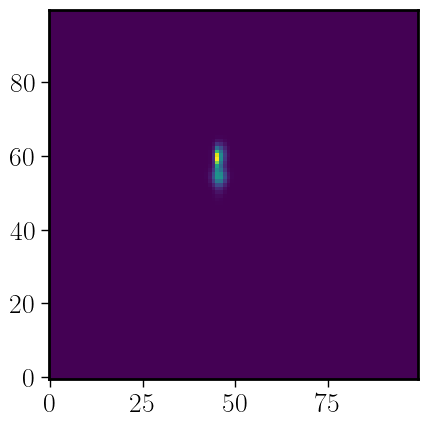

In [146]:
I=2
plt.imshow(hdu_Te_lg.data[I,:,:],origin='lower')
#plt.imshow(hdu_Te_Met.data[I,:,:],origin='lower')
#plt.imshow(hdu_Met_Alf.data[I,:,:],origin='lower')



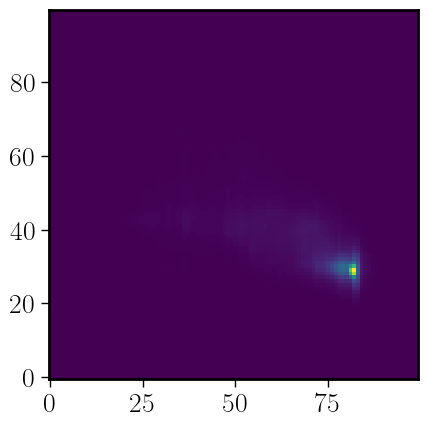

In [147]:
hdu_now=hdu_Met_Alf
map_now=np.sum(hdu_now.data,axis=0)
map_now=map_now/np.sum(map_now)
plt.imshow(map_now,origin='lower')

1235
[0 1 2 3]


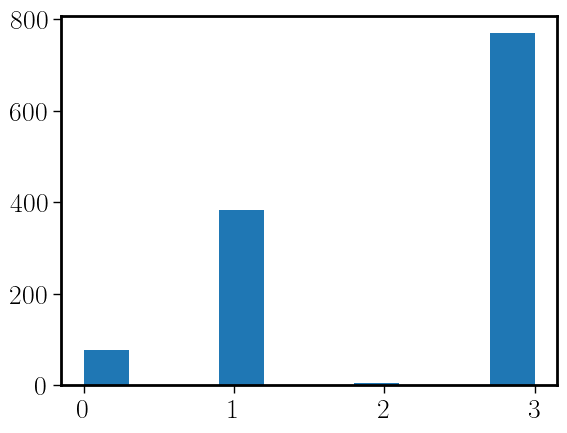

In [148]:
plt.hist(cluster)
print(len(cluster))
print(np.unique(cluster))


1235
13671


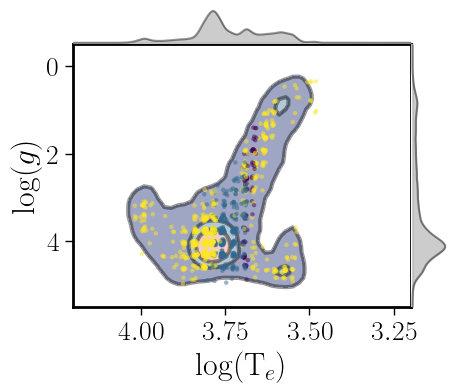

In [149]:
#mask_SN =  (tab['SNR']>SN_lim)
mask = (tab['FNORM']>0) & (mask_SN)
mask_few = tab_few['FNORM']>0
mask_few = mask_few & (tab_few['N_ST']>0)
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.99999,0.65,0.25,0.0],fsize=(4.5,3.5))
sc=ax.scatter(tab_few['TEFF'],tab_few['LOGG'],c=cluster,edgecolor='None',alpha=0.5,s=10)
#fig.colorbar(sc, ax=ax)

print(len(tab_few['TEFF']))
print(len(tab[mask]))

1235
14473


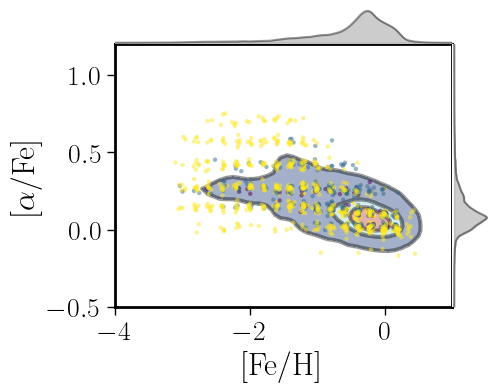

In [150]:
mask = tab['FNORM']>0 & mask_SN
mask_few = tab_few['FNORM']>0

fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.99,0.65,0.25,0.0],fsize=(4.5,3.5))
#ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='k',edgecolor='None',alpha=0.1,s=10)

ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],c=cluster,edgecolor='None',alpha=0.5,s=10)

print(len(tab_few['TEFF'][mask_few]))
print(len(tab[mask]))


(384, 6351)


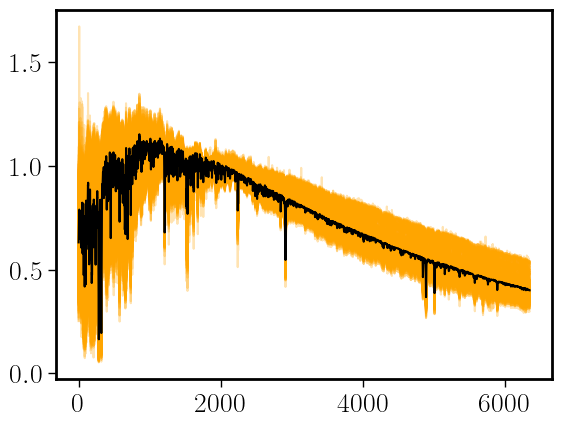

In [151]:
cluster_now=1
spec2D = hdu_few[0].data[cluster==cluster_now]
print(spec2D.shape)
for spec in spec2D:
    plt.plot(spec,alpha=0.3,color='orange')
spec_mean=np.mean(spec2D,axis=0)
plt.plot(spec_mean,color='k')

[False False False ... False False False]
384
14473


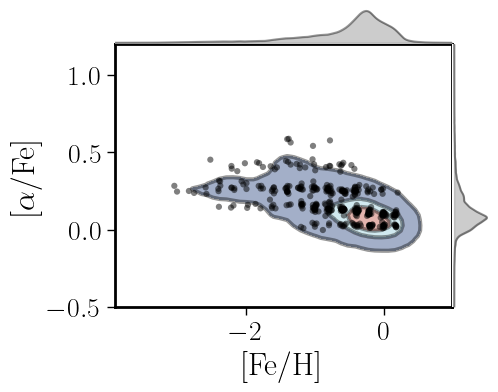

In [152]:
mask = tab['FNORM']>0 & mask_SN
mask_few = (cluster==cluster_now)

print(mask_few)

fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-3.9,x_max=0.99,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.99,0.65,0.25,0.0],fsize=(4.5,3.5))
#ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='k',edgecolor='None',alpha=0.1,s=10)

ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='k',edgecolor='None',alpha=0.5,s=20)

print(len(tab_few['TEFF'][mask_few]))
print(len(tab[mask]))


1235
13671


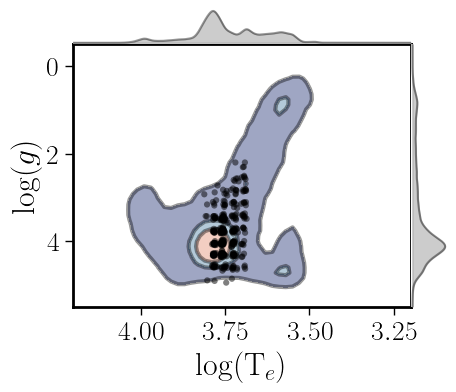

In [153]:
mask = (tab['FNORM']>0) & (mask_SN)
#mask_few = tab_few['FNORM']>0
#mask_few = mask_few & (tab_few['N_ST']>0)
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.99999,0.65,0.25,0.0],fsize=(4.5,3.5))
sc=ax.scatter(tab_few['TEFF'][mask_few],tab_few['LOGG'][mask_few],color='k',edgecolor='None',alpha=0.5,s=20)
#fig.colorbar(sc, ax=ax)

print(len(tab_few['TEFF']))
print(len(tab[mask]))

1235
13671


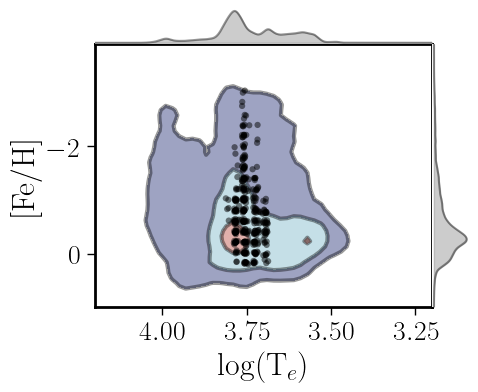

In [154]:
mask = (tab['FNORM']>0) & (mask_SN)
#mask_few = tab_few['FNORM']>0
#mask_few = mask_few & (tab_few['N_ST']>0)
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['MET'][mask],\
          x_label=r'log(T$_e$)', y_label=r'[Fe/H]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-3.9,y_max=0.99,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.99999,0.65,0.25,0.0],fsize=(4.5,3.5))
sc=ax.scatter(tab_few['TEFF'][mask_few],tab_few['MET'][mask_few],color='k',edgecolor='None',alpha=0.5,s=20)
#fig.colorbar(sc, ax=ax)

print(len(tab_few['TEFF']))
print(len(tab[mask]))

In [155]:
keyList=['N_ST','TEFF','LOGG','MET','ALPHAM','FNORM']#,'e_TEFF','e_LOGG','e_MET','e_ALPHAM','e_FNORM']
e_keyList=['N_ST','TEFF','LOGG','MET','ALPHAM','FNORM','e_TEFF','e_LOGG','e_MET','e_ALPHAM']


params_mean = []
for I,cl in enumerate(np.unique(cluster)):
    spec2D = hdu_few[0].data[cluster==cl]
    spec_mean=np.mean(spec2D,axis=0)
    spec_std=np.std(spec2D,axis=0)
    if (I==0):
        spec2D_mean = spec_mean
        spec2D_std = spec_std
    else:
        spec2D_mean = np.vstack((spec2D_mean,spec_mean))
        spec2D_std = np.vstack((spec2D_std,spec_std))
    tab_sel = tab_few[cluster==cl]
    
    n_sel=len(tab_sel)
    params = {}
    print('.',end='')
    params['N_ST']=n_sel
    for cols in tab_sel.columns:
        try:
            params[cols]=np.mean(tab_sel[cols])
        except:
            params[cols]=tab_sel[cols][0]
        try:
            params['e_'+cols]=np.sqrt(np.std(tab_sel[cols])**2+\
                                      np.max(tab_sel['e_'+cols])**2)
        except:
            non_std=True                
    params_mean.append(params)
        
        
        
        
tab_cl=Table()
for key in e_keyList:
    vals=[]
    for i in np.arange(len(params_mean)):
        
        vals.append(params_mean[i][key])
    #print(key,vals)
    vals=np.array(vals)
    if (key.find('e_')>-1):
        mask_vals = (vals==0)
        vals_0=vals[vals==0.0]
        vals[vals==0.0] = np.mean(vals[vals!=0.0])
    tab_cl.add_column(vals,name=key)


    
    

....

In [156]:
tab_cl

N_ST,TEFF,LOGG,MET,ALPHAM,FNORM,e_TEFF,e_LOGG,e_MET,e_ALPHAM
float64,float32,float32,float32,float32,float32,float32,float32,float32,float32
7.597402597402597,3.6799448,2.904185,-0.5451059,0.122721165,3.51407e-14,0.0063306633,0.07482906,0.049142007,0.026182717
16.0390625,3.747338,3.8304975,-0.77276057,0.18482776,1.8134676e-14,0.0068913135,0.072702125,0.04937032,0.030586401
10.25,3.6890512,2.9599779,0.0701679,0.011974244,3.454438e-13,0.007153379,0.05952531,0.03037108,0.0207094
12.01038961038961,3.7700624,3.620324,-1.1056831,0.20849109,6.4905804e-14,0.006755515,0.07032133,0.050010353,0.03209906


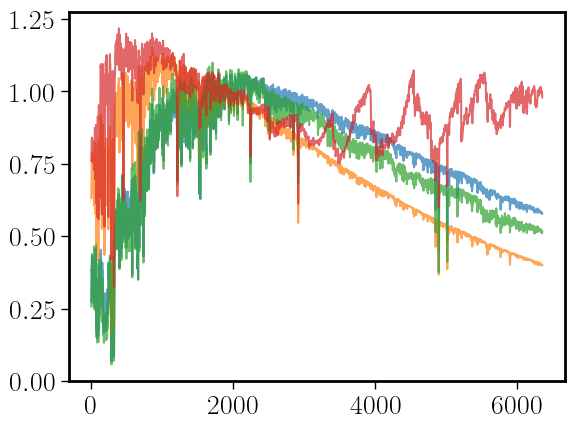

In [157]:
for spec in spec2D_mean:
    plt.plot(spec,alpha=0.7)#,color='orange')


4
13671


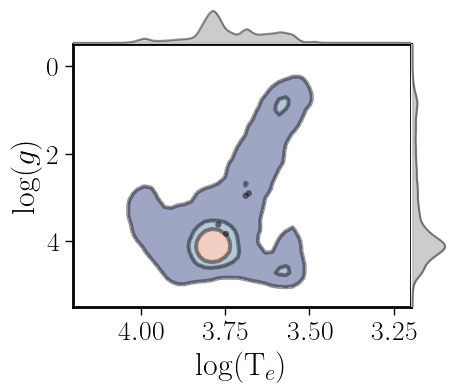

In [158]:
mask = (tab['FNORM']>0) & (mask_SN)
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.99999,0.65,0.25,0.0],fsize=(4.5,3.5))
sc=ax.scatter(tab_cl['TEFF'],tab_cl['LOGG'],color='k',edgecolor='None',alpha=0.5,s=20)
#fig.colorbar(sc, ax=ax)

print(len(tab_cl))
print(len(tab[mask]))

4
14473


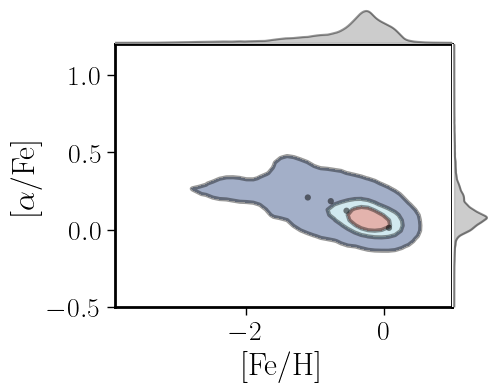

In [159]:
mask = tab['FNORM']>0 & mask_SN

fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-3.9,x_max=0.99,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.99,0.65,0.25,0.0],fsize=(4.5,3.5))
#ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='k',edgecolor='None',alpha=0.1,s=10)

ax.scatter(tab_cl['MET'],tab_cl['ALPHAM'],color='k',edgecolor='None',alpha=0.5,s=20)

print(len(tab_cl))
print(len(tab[mask]))


4
13671


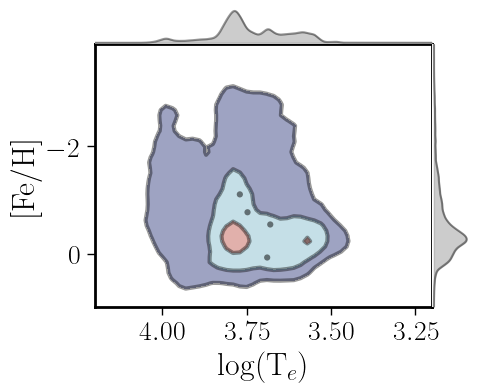

In [160]:
mask = (tab['FNORM']>0) & (mask_SN)
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['MET'][mask],\
          x_label=r'log(T$_e$)', y_label=r'[Fe/H]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-3.9,y_max=0.99,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.99999,0.65,0.25,0.0],fsize=(4.5,3.5))
sc=ax.scatter(tab_cl['TEFF'],tab_cl['MET'],color='k',edgecolor='None',alpha=0.5,s=20)
#fig.colorbar(sc, ax=ax)

print(len(tab_cl['TEFF']))
print(len(tab[mask]))

In [161]:
spec2D_mean.shape
spec2D_std.shape
#tab_

(4, 6351)

In [162]:
######################################################

In [163]:
n_st=len(tab_cl)
out_file_rss=f'mstar-stlib-cl-{n_clusters}.fits.gz'
hdu_rss = fits.PrimaryHDU(spec2D_mean,header=hdu_few[0].header)
hdu_tab = fits.BinTableHDU(tab_cl,name='PARAMETERS')
hdu_err = fits.ImageHDU(spec2D_std,header=hdu_few[0].header,name='ERROR')
hdu_tab_org = fits.BinTableHDU(tab_few,name='ORG_PARAM')
hdu_list = fits.HDUList([hdu_rss,hdu_tab,hdu_err,hdu_tab_org,hdu_Te_lg,hdu_Te_Met,hdu_Te_Alf,hdu_Met_Alf,hdu_Met_lg,hdu_lg_Alf])
hdu_list.writeto(out_file_rss,overwrite=True)


In [164]:
######################################################